# COMP0164: Digital Finance
## Group Coursework

If you have set up an **`Anaconda`** environment, don't forget to activate it using:

> conda activate digital_finance_env

Below are the imports that you will need for the coursework:

In [3]:
#Test
import datetime
import numpy as np
import pandas as pd
import scipy as sp

import yfinance as yf
import numpy_financial as npf

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Corporate Finance **\[15 marks\]**
In this question, you are asked to evaluate business and investment ideas.

You are tasked with evaluating an investment project proposed by a company called Boogle. During the latest earnings report, Boogle's CFO announced an investment of \$150 million for a new business expansion project. The project is planned to be financed with an \$100 million public offering of a 10-year debt and the remainder with an equity offering. You have collected the information necessary to evaluate this project in Exhibits 1 and 2.

### Exhibit 1: Relevant Information for Analysis
| | |
| --- | --- |
| Equity risk premium | 4.53% |
| Risk-free rate of interest | 3.9% |
| Market value of Boogle's debt | \$1.0 billion |
| Market value of Boogle's equity | \$2.6 billion |
| Boogle's equity beta | 1.4 |
| Boogle's before-tax cost of debt | 9.2% |
| Corporate tax rate | 37.5% |

### Exhibit 2: Estimated Project Financials
|     | Year 1 | Year 2 | Year 3 |
| --- | --- | --- | --- |
| Revenue | 98.7 | 110.3 | 112.6 |
| Operating Costs | 32  | 36  | 38  |
| Depreciation | 16  | 16  | 16  |

a.) Calculate the after-tax weighted average cost of capital of Boogle prior to its new project investment. **\[3 marks\]**

Expected return on equity portion $r_E$ can be calculated by:

$$
r_E = r_f + \beta_E (E[r_m] - r_f)
$$

where 
- $r_f$ is the risk-free rate of interest 
- $\beta_E$ is the equity beta 
- $E[r_m] - r_f$ can be calculated as the equity risk premium

The after-tax weighted average cost of capital (WACC) can be calculated as:

$$
WACC = r_D (1 - T_c) \frac{D}{D + E} + r_E \frac{E}{D + E}
$$

where 
- $r_D$ is the before-tax cost of debt
- $T_c$ is the corporate tax rate
- $D$ is the market value of Boogle's debt
- $E$ is the market value of Boogle's equity
- $r_E$ is the expected return on equity

In [4]:
# Define the variables
equity_risk_premium = 4.53 / 100    # Equity risk premium
risk_free_rate = 3.9 / 100          # Risk-free rate of interest
market_value_debt = 10**9           # Market value of Boogle's debt
market_value_equity = 2.6 * 10**9   # Market value of Boogle's equity
beta_equity = 1.4                   # Boogle's equity beta
expected_return_debt = 9.2 / 100    # Before-tax cost of debt
corporate_tax_rate = 0.375          # Corporate tax rate


In [5]:
def calculate_expected_return_equity(risk_free_rate, equity_beta, equity_risk_premium):
    return risk_free_rate + equity_beta * equity_risk_premium

def after_tax_WACC(r_d, r_e, t_c, d, e):
    return r_d * (1 - t_c) * d / (d + e) + r_e * e / (d + e)


expected_return_equity = calculate_expected_return_equity(risk_free_rate, beta_equity, equity_risk_premium)
wacc = after_tax_WACC(expected_return_debt, expected_return_equity, corporate_tax_rate, market_value_debt, market_value_equity)

print(f"The after-tax weighted average cost of capital of Boogle is: {wacc:.2%}")

The after-tax weighted average cost of capital of Boogle is: 8.99%


In [6]:
# # This is the testing code from previous year
# # Remove it before submitting!!!!!!!!!!!!!!

# def WACC(D, E, r_d, t, r_f, beta, r_p):
#     w_d = D / (D+E)
#     w_e = E / (D+E)
#     r_e = r_f + beta * r_p
#     return w_d * r_d * (1-t) + w_e * r_e

# wacc = WACC(10**9, 2.6*10**9, 0.092, 0.375, 0.039, 1.4, 0.0453)
# print('The weighted average cost of capital is: ', '{0:.4%}'.format(wacc))

b.) Find Boogle's after-tax asset beta prior to the new project. **\[2 marks\]**

In [7]:
# Answer here

beta_e = 1.4
debt = 1.0*10**9
equity = 2.6*10**9
tax_rate = 0.375

def find_beta_a(beta_e, debt, equity, tax_rate):
    return beta_e * (1/(1 + debt*(1-tax_rate)/equity))
# v = debt + equity  # total value of the securities
# beta_a = beta_e * (1 +  debt*(1-tax_rate)/equity)

beta_a = find_beta_a(beta_e, debt, equity, tax_rate)


# def find_beta_e(beta_a, debt, equity, tax_rate):
#     return beta_a * (1 + debt * (1 - tax_rate) / equity)

print(beta_a)
print(f"The after-tax asset beta prior to the new project is: {beta_a:.5}")
# print(find_beta_e(beta_a, debt, equity, tax_rate))

1.1286821705426355
The after-tax asset beta prior to the new project is: 1.1287


c.) Assuming the new project has the same asset beta as the Boogle company in b.), find the the project equity beta. **\[2 marks\]**

The project equity beta $ \beta_{pe} $ can be calculated from:

$$
\beta_{pe} = \beta_{asset} \cdot \left[1 + (1 - t) \cdot \frac{D_p}{E_p}\right]
$$

where $ \beta_{asset} $ is the asset beta, $ t $ is the tax rate, $ D_p $ is the project debt, and $ E_p $ is the project equity.

Therefore, we have:

$$
\beta_{pe} = 1.12868 \cdot \left[1 + (1 - 37.5\%) \cdot \frac{100}{50}\right] \\
= 1.12868 \cdot 2.25 \\
= 2.53953
$$

In [8]:
# Answer here
def find_beta_pe(beta_a, t, d_p, e_p):
    return beta_a * (1 + (1 - t) * d_p / e_p)  # Calculate the equity beta (Beta_E)

total = 150 * 10**6  # Total investment
d_p = 100 * 10**6    # Debt portion
e_p = total - d_p    # Equity portion calculated as total investment minus debt
tax_rate = 0.375     # Corporate tax rate (37.5%)

project_beta_pe = find_beta_pe(beta_a, tax_rate, d_p, e_p) # Calculate project equity beta

print(f"Project Equity Beta: {project_beta_pe:.5f}")

Project Equity Beta: 2.53953


In [9]:
# # testing code
# def beta_project(beta_a, t, D_p, E_p):
#     return beta_a * (1+(1-t)*D_p/E_p)

# beta_pe = beta_project(beta_a, 0.375, 100, 50)
# print('The project equity beta is: ', '{0:.4f}'.format(beta_pe))

d.) The formula for project after-tax free cash flow at time t is

$$ FCF = (\text{Revenue}-\text{Operating Costs}-\text{Depreciation})\times(1-\text{Tax Rate})+\text{Depreciation}.$$

Define a Python function to calculate the project FCFs and demonstrate that the after-tax free cash flow generated for the next three years are $47.7 million, $52.4 million, and $52.6 million respectively. **\[2 marks\]**

In [10]:
# Answer here
#Revenues are 98.7, 110.3, 112.6 
#Operating Costs are 32, 36, 38
#Depreciation is 16, 16, 16
#Tax Rate is 0.375
#The initial investment is 150 million
#FCF = (Revenues - Operating Costs - Depreciation) * (1 - Tax Rate) + Depreciation
#The Values from required are stored in the lists below
revenues = [98.7, 110.3, 112.6]
operating_costs = [32, 36, 38]
depreciation = [16, 16, 16]
#The Free Cash Flow for each year is appended to this list so that it can be used later in the next section to find NPV and IRR
FCFs = [-150]
def FCF(revenue, operating_cost, depreciation, tax_rate):
    #The formula mentioned above is used in this function to calculate the Free Cash Flow
    FCF = (revenue - operating_cost - depreciation) * (1 - tax_rate) + depreciation
    return FCF #The function returns the Free Cash Flow
#The for loop is used to calculate the Free Cash Flow for each year
for i in range(len(revenues)):
    #The FCF function is called to calculate the Free Cash Flow for each year
    fcf= FCF(revenues[i], operating_costs[i], depreciation[i], 0.375)
    #The calculated FCF is appended to the FCFs list
    FCFs.append(fcf)
    #The FCF for each year is printed
    print("The FCF for year {i} is ${fcf:.1f} million".format(i=i+1, fcf=fcf))

The FCF for year 1 is $47.7 million
The FCF for year 2 is $52.4 million
The FCF for year 3 is $52.6 million


e.) Find the project NPV and IRR with the next three years after-tax free cash flow given in d.).**\[3 marks\]**

The NPV formula:

$$
NPV = \sum_{t=0}^{n} \frac{FCF_t}{(1 + r)^t} - C_0
$$


Where:
- $C_0$ : the initial investment

The IRR formula:

$$
0 = \sum_{t=0}^{n} \frac{FCF_t}{(1 + IRR)^t}
$$

In [11]:
# Answer here
#The Net Present Value (NPV) is calculated using the numpy_financial library's npf.npv() function
#The IRR is calculated using the numpy_financial library's npf.irr() function

# Ensure that the cell containing the definition of wacc is executed before this cell
npv = npf.npv(wacc, FCFs)

irr = npf.irr(FCFs)

print("The Net Present Value (NPV) of the project is: ${npv:.2f} million".format(npv=npv))
print("The Internal Rate of Return (IRR) of the project is: {irr:.3%}".format(irr=irr))



The Net Present Value (NPV) of the project is: $-21.46 million
The Internal Rate of Return (IRR) of the project is: 0.899%


Assume the following is a dividend-paying stock.

### Stock:
Atat Steel is in the steel manufacturing sector with a required rate of return of 7.35%. You estimate that if the economy is booming, the company’s current annual dividend of $0.8 per share will grow 10.5% a year for the next four years and then stabilize at a 3.5% growth rate a year indefinitely. However, if the economy falls into a recession, then Atat Steel will not likely experience the elevated 10.5% short-run growth and instead will grow by 3.5% indefinitely.

f.) Use the discount dividend method and find the current value of Atat Steel stock under both economic conditions. **\[3 marks\]**

The **booming economy scenario**: in order to find the dividened for the first 4 years we use Multi - Staged Dividened Discount Model with the formula

$$
P_0 = \sum_{t=1}^H \frac{D_t}{(1 + r)^t} + \frac{D_H (1 + g_2)}{(r - g_2)(1 + r)^H}
$$

$$ 
Dt = D(t-1) \times (1 + g_1)^t 
$$


Where:
- $P_0$ : Current price of the stock.
- $D_0$ : Current dividend.
- $g_1$ : Short-term growth rate.
- $g_2$: Long-term growth rate.
- $r$: Required rate of return.
- $H$ : Number of boom years
- $D_t$ : Dividened 

The the **recession** scenario: in order to find the dividened the Constant Growth Dividened Method is used as demonstrated below.
$$
P_0 = \frac{D_0 \times  (1 + g_2)}{(r - g_2)}
$$

Where:
- $P_0$: Current price of the stock.
- $D_0$: Current dividend.
- $g_2$: Constant growth rate.
- $r$: Required rate of return.




In [12]:
# Answer here 

#Initialise the parameters for both scenarios
first_dividend = 0.8
required_rate_of_return = 0.0735
growth_rate = 0.035

#Function to find the dividends for the next year when there is growth
def Next_year_dividend(dividend, growth_rate):

    return dividend * (1 + growth_rate)

#Function to find the perpetual dividend
def perpetual_dividend(dividend, growth_rate, required_rate_of_return):
    return dividend * (1 + growth_rate) / (required_rate_of_return - growth_rate)

#Function to find the dividends for each year during the growth period
def Dividends_growth_period(first_dividend, boom_years):
    boom_dividends = []
    for i in range(boom_years):
        #The first year dividend is calculated using the formula: Dividend * (1 + g)
        if i == 0:
            next_year_dividend = Next_year_dividend(first_dividend, growth_rate_boom)
        #The subsequent year dividends are calculated using the formula: Previous year Dividend * (1 + g)^the current year
        else:
            next_year_dividend = Next_year_dividend(boom_dividends[-1], growth_rate_boom)
        boom_dividends.append(next_year_dividend)
    return boom_dividends

#Function to find the NPV of the dividends during the growth period
def NPV_dividends_growth(boom_dividends, required_rate_of_return):
    boom_dividends_npv = 0
    for i in range(len(boom_dividends)):
        #The NPV of the dividends is calculated using the formula: Dividend of year t / (1 + r) ^ t
        boom_dividends_npv += boom_dividends[i] / ((1 + required_rate_of_return) ** (i + 1))
    return boom_dividends_npv

#This section is for the Booming economy:

#Initialise the parameters for the booming economy
years_boom = 4
growth_rate_boom = 0.105

#Calculate the dividends for each year during the booming economy
boom_dividends = Dividends_growth_period(first_dividend, years_boom)

#Find the NPV for the first 4 years of the booming economy:
boom_dividends_npv = NPV_dividends_growth(boom_dividends, required_rate_of_return)

#Find the perpetual growth rate for the dividends during the booming economy
perpetual_boom = perpetual_dividend(boom_dividends[-1], growth_rate, required_rate_of_return)

#Find the NPV of the perpetual growth rate for the dividends during the booming economy
perpetual_boom_npv = perpetual_boom/((1+required_rate_of_return)**years_boom)

#Calculate the terminal value of the company during the booming economy

P0_boom = boom_dividends_npv + perpetual_boom_npv

print("The price of the stock in the case of booming economy is: ${P0_boom:.2f}".format(P0_boom=P0_boom))

#This section is for the Recession economy:

P0_recession = perpetual_dividend(first_dividend, growth_rate, required_rate_of_return)

print("The price of the stock in the case of recession economy is: ${P0_recession:.2f}".format(P0_recession=P0_recession))



The price of the stock in the case of booming economy is: $27.59
The price of the stock in the case of recession economy is: $21.51


In [13]:
#Delete this cell before submitting!!!!!!!!!
#Test case for our code and we get the same result using the take home exam code
"""def compute_npv(CF, r):
    npv = CF[0]
    for i in range(1,len(CF)):
        npv += CF[i] / (1+r)**i
    return npv

D0 = 0.8
g1 = 0.105
g2 = 0.035
r = 0.0735

D1 = D0 * (1+g1)
D2 = D0 * (1+g1)**2
D3 = D0 * (1+g1)**3
D4 = D0 * (1+g1)**4
D5 = D0 * (1+g1)**4 * (1+g2)

P4 = D5 / (r-g2)

P0_booming = compute_npv([0, D1, D2, D3, D4+P4], r)
print('The current value when the economy is booming: ', '{0:0.2f}'.format(P0_booming))

P0_recession = D0 * (1+g2) / (r-g2)
print('The current value when the economy falls into a recession: ', '{0:0.2f}'.format(P0_recession))"""

"def compute_npv(CF, r):\n    npv = CF[0]\n    for i in range(1,len(CF)):\n        npv += CF[i] / (1+r)**i\n    return npv\n\nD0 = 0.8\ng1 = 0.105\ng2 = 0.035\nr = 0.0735\n\nD1 = D0 * (1+g1)\nD2 = D0 * (1+g1)**2\nD3 = D0 * (1+g1)**3\nD4 = D0 * (1+g1)**4\nD5 = D0 * (1+g1)**4 * (1+g2)\n\nP4 = D5 / (r-g2)\n\nP0_booming = compute_npv([0, D1, D2, D3, D4+P4], r)\nprint('The current value when the economy is booming: ', '{0:0.2f}'.format(P0_booming))\n\nP0_recession = D0 * (1+g2) / (r-g2)\nprint('The current value when the economy falls into a recession: ', '{0:0.2f}'.format(P0_recession))"

## Question 2: Bonds and Fixed Income **\[16 marks\]**
In this question, you are given background information on some bonds and you tasked with calculating crucial data about them.

### Exhibit 3: Current Par Rates and Spot Rates
| Maturity | Par Rate (Annual) | Spot Rate (Annual) |
| --- | --- | --- |
| 1 year | 2.50% | 2.50% |
| 2 years | 3.02% | 3.00% |
| 3 years | 3.53% | 3.50% |
| 4 years | 3.98% | 4.00% |
| 5 years | 4.42% | ? |

### Exhibit 4: Information for Selected Bonds
| Bond Name | Maturity | Coupon (Annual) | Type of Bond |
| --- | --- | --- | --- |
| Bond A (Face value $1,000) | 3 years | 6.78% | Option-free |
| Bond B | 3 years | 4.30% | Callable at par on start of year 1 and tear 2 |
| Bond C | 3 years | 4.30% | Putable at par on start of year 1 and year 2 |

### Exhibit 5: Binomial Interest Rate Tree, based on an estimated interest rate volatility of 10%, where ‘u’ represents an up move and ‘d’ represents a down move.
| Year 0 | Year 1 | Year 2 |
| --- | --- | --- |
| 2.3400% (r) | 3.5930% (ru node) | 4.6540% (ruu node) |
|  | 2.9417% (rd node) | 3.8043% (rud node) |
|  |  | 3.1254% (rdd node) |

a.) Based on Exhibit 3, find the five-year spot rate. **\[2 marks\]**

To calculate the five-year spot rate, we use the following formula

$$
P = \sum_{t=1}^{5} \frac{CF_t}{(1 + S_t)^t} + \frac{P}{(1 + S_5)^5}
$$

Where:
- $P$: Price of the bond (assume $P = 100 $ for par value).
- $CF_t$: Annual coupon payment ($(C = 100 \times \text{Par Rate}$)).
- $S_t$: Known spot rates for $(t = 1, 2, 3, 4)$.
- $S_5$: The unknown spot rate for 5 years.

Steps:
$$
P = \frac{CF_1}{(1+S_1)}+ \frac{CF_2}{(1+S_2)^2}+ \frac{CF_3}{(1+S_3)^3}+ \frac{CF_4}{(1+S_4)^4}+ \frac{CF_5 + P}{(1+S_5)^5}
$$

$$
100 = \frac{CF_1}{(1+S_1)}+ \frac{CF_2}{(1+S_2)^2}+ \frac{CF_3}{(1+S_3)^3}+ \frac{CF_4}{(1+S_4)^4}+ \frac{CF_5 + 100}{(1+S_5)^5}
$$

Where:

- $CF$: $0.0442 \times\ 100$
$$
100 = \frac{(4.42)}{(1+0.025)}+ \frac{(4.42)}{(1+0.03)^2}+ \frac{(4.42)}{(1+0.035)^3}+ \frac{(4.42)}{(1+0.04)^4}+ \frac{(4.42 + 100)}{(1+S_5)^5}
$$

$$
 (1+S_5)^5 = 1.247



In [14]:
# Answer here
#The parameters for the calculation are defined
spot_rate_list = [0.025, 0.03, 0.035, 0.04]

par_rate = 0.0442
#Assuming a face value of $100 to calculate the five-year spot rate
p = 100

def find_spot_rate(p, par_rate, spot_rate_list):
    #The spot rate for each year is calculated usiing the formula: (p*par) / (1 + spot_rate) ^ t
    total_spot_rate_vals = 0
    for i in range(len(spot_rate_list)):
        total_spot_rate_vals += (p * par_rate)/((1 + spot_rate_list[i])**(i+1))
    print(total_spot_rate_vals)
    #The formula (1+S5)^5 = (100+4.42)/(100 - 16.24329032372646)
    spot_rate_val_power = (p + (par_rate * p))/(p - total_spot_rate_vals)
    print(spot_rate_val_power)
    #The spot rate for the 5th year is calculated using S_5 = ((100 + 4.42)/(100 - total_spot_rate_vals)) ^ (1/5) - 1
    spot_rate = spot_rate_val_power**(1/(len(spot_rate_list)+1)) - 1

    return spot_rate

five_year_spot_rate = find_spot_rate(p, par_rate, spot_rate_list)

print("The five-year spot rate is: {five_year_spot_rate:.3%}".format(five_year_spot_rate=five_year_spot_rate))





16.24329032372646
1.2467060896206614
The five-year spot rate is: 4.509%


In [15]:
#Delete this cell before submitting!!!!!!!!!
#Test case for our code and we get the same result using the take home exam guy code
"""def compute_spot_rate(spot_rate_list, par_rate):
    f = 1
    cf = 1 * par_rate
    for i in range(len(spot_rate_list)):
        f -= cf / ((1+spot_rate_list[i])**(i+1))
    print(f)
    f = (1+cf) / f
    print(f)
    s = f**(1/(len(spot_rate_list)+1)) - 1
    return s
spot_rate_list = [0.025, 0.03, 0.035, 0.04]

par_rate = 0.0442
s_5 = compute_spot_rate(spot_rate_list, par_rate)
print('The five-year spot rate is: ', '{0:.4%}'.format(s_5))"""


"def compute_spot_rate(spot_rate_list, par_rate):\n    f = 1\n    cf = 1 * par_rate\n    for i in range(len(spot_rate_list)):\n        f -= cf / ((1+spot_rate_list[i])**(i+1))\n    print(f)\n    f = (1+cf) / f\n    print(f)\n    s = f**(1/(len(spot_rate_list)+1)) - 1\n    return s\nspot_rate_list = [0.025, 0.03, 0.035, 0.04]\n\npar_rate = 0.0442\ns_5 = compute_spot_rate(spot_rate_list, par_rate)\nprint('The five-year spot rate is: ', '{0:.4%}'.format(s_5))"

b.) Assuming the law of one price, use Exhibit 3 to calculate the compounded forward rate (annualy compounded) of a one-year loan starting in three years. **\[1 mark\]**

$$
f_(34) = \frac {(1 + S_4)^4}{(1 + S_3)^3} -1
$$
Where
- $S_4$: 4.00%
- $S_3$: 3.50%
$$
f_(34) = \frac {(1 + 0.04)^4}{(1 + 0.035)^3} -1
$$


In [16]:
# Answer here

#The parameters for the calculation are defined
spot_rate_year_3 = 0.035
spot_rate_year_4 = 0.04

#The spot rate for the 3rd year is 3.5% and the spot rate for the 4th year is 4% based on Exhibit 3

def find_forward_rate(spot_rate_year_3, spot_rate_year_4):
    #The forward rate for the 4th year is calculated using the formula: (1 + spot_rate_year_4) ^ 4 / (1 + spot_rate_year_3) ^ 3 - 1
    forward_rate = ((1 + spot_rate_year_4) ** 4 / (1 + spot_rate_year_3) ** 3) - 1

    return forward_rate

forward_rate = find_forward_rate(spot_rate_year_3, spot_rate_year_4)

print("The forward rate for a one-year loan made in three years is: {spot_rate_one_year_loan:.4%}".format(spot_rate_one_year_loan=forward_rate))

The forward rate for a one-year loan made in three years is: 5.5145%


c.) Given spot rates for one-, two-, and three-year zero bonds, how many forward rates can be calculated? Please list the compounded forward rates (annualy compounded) that can be calculated and briefly explain your answer. **\[3 marks\]**

Forward rate formula is: 

$$
RF = \frac {R2 \times T2 - R1 \times T1}{T2 - T1}
$$

In [17]:
# Answer here
"""
The first forward rate can be calcualted for a one year loan starting in year 0 (f0,1 = S1)
The second forward rate can be calcualted for a one year loan starting year 1 (f1,2)
The third forward rate can be calcualted for a one year loan starting year 2 (f2,3)
A fourth forward rate can be calcualted for a two year loan spanning for 2 years starting in year 1 until year 3 (f1,3)

f(0,1) = S1 = 0.025
f(1,2) = (1+S2)^2 / (1+S1)^1 - 1 
f(2,3) = (1+S3)^3 / (1+S2)^2 - 1
f(1,3) = (1+S3)^3 / (1+S1)^1 - 1

"""

'\nThe first forward rate can be calcualted for a one year loan starting in year 0 (f0,1 = S1)\nThe second forward rate can be calcualted for a one year loan starting year 1 (f1,2)\nThe third forward rate can be calcualted for a one year loan starting year 2 (f2,3)\nA fourth forward rate can be calcualted for a two year loan spanning for 2 years starting in year 1 until year 3 (f1,3)\n\nf(0,1) = S1 = 0.025\nf(1,2) = (1+S2)^2 / (1+S1)^1 - 1 \nf(2,3) = (1+S3)^3 / (1+S2)^2 - 1\nf(1,3) = (1+S3)^3 / (1+S1)^1 - 1\n\n'

d.) Find the yield to maturity for Bond A. **\[4 marks\]**

In order to calculate yield to maturity of for Bond A, the following formula is used: 

$$
PV = \sum_{t = 1}^n \frac{C}{(1 + y)^t} + \frac{P}{(1+y)^n}
$$

Where
- $PV$ : Present value or price of the bond 
- $P$ : Face value of the bond (In the case of Bond A = $1000)
- $C$ : Annual coupon payments (in the case of Bond A: $1000 \times 6.78% = $67.8)
- $y$ : Yield to maturity of the bond
- $n$ : Number of periods to maturity (In case of Bond A this is 3 years)

$$
1093.14 = \frac{67.8}{(1 + 0.025)} + \frac{67.8}{(1 + 0.03)^2} + \frac{67.8}{(1 + 0.035)^3} + \frac{1000}{(1 + 0.035)^3}
$$
$$
1093.14 = \frac{67.8}{(1 + y)} + \frac{67.8}{(1 + y)^2} + \frac{67.8}{(1 + y)^3} + \frac{1000}{(1 + y)^3}
$$

In [18]:
# Answer here
#Defining the spot rates for Bond A
face_val = 1000
coupan_rate = 0.0678
maturity = 3
spot_rate_lst = [0.025, 0.03, 0.035]
#Defining the function to find the present value of the bond
def find_PV(face_val, coupan, maturity, spot_rates):
    #The present value of the bond is calculated using the formula: (C / (1 + r) ^ t) + (F / (1 + r) ^ t)
    coupans = coupan * face_val

    PV = 0
    for i in range(len(spot_rates)+1):
        #The present value of the coupan is calculated for each year and also the present value of the face value for the last year is calculated then all are added to get the present value of the bond
        if i == len(spot_rates)-1:
            PV += (face_val + coupan) / ((1 + spot_rates[i-1]) ** (i))
            break
        else:
            PV += coupans / ((1 + spot_rates[i]) ** (i+1))
    return PV
PV = find_PV(face_val, coupan_rate, maturity, spot_rate_list)

#Define function to find the yield to maturity

def Find_ytm(PV, face_val, coupan, maturity):
    #Find the values for the bond to calculate the yield to maturity
    vals = [-PV]
    #Calculate the coupan for each year 
    coupans = coupan * face_val
    #Append the coupan for each year to the list of values and the face value for the last year
    for i in range(maturity):
        if i == maturity-1:
            vals.append(face_val + coupans)
        else:
            vals.append(coupans)
    #The yield to maturity is calculated using the numpy_financial library's npf.irr() function
    ytm = npf.irr(vals)

    return ytm

ytm = Find_ytm(PV, face_val, coupan_rate, maturity)
print("The yield to maturity of Bond A is: {ytm:.3%}".format(ytm=ytm))

The yield to maturity of Bond A is: 3.456%


e.) Based on Exhibit 5, assume an equal probability of interest rate going up and down at each node. Calculate the value of Bond B and Bond C with the binomial tree model. **\[3 marks\]**

Values acheived for realisations is presented in this table: 

$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{Realisation} & \boldsymbol{P_0} & \boldsymbol{P_1} & \boldsymbol{P_2} \\
\hline
uu, u & 1022.63 & 1003.56 & 996.62 \\
ud, u & 1030.32 & 1011.43 & 1004.78 \\
ud, d & 1036.58 & 1017.83 & 1004.78 \\
dd, d & 1042.86 & 1024.26 & 1011.39 \\
\hline
\end{array}
$$

In [19]:
# Answer here
# Answer here

#Finding the total cashflow for both bonds B and C
#The parameters for the calculation are defined
ruu, rud, rdd, ru, rd, r0 = 0.04654, 0.038043, 0.031254, 0.03593, 0.029417, 0.0234
face_val_B_C = 1000
coupan_rate_B_C = 0.043

#The total cashflow in Y3:

total_cashflow_Y3 = face_val_B_C + coupan_rate_B_C * face_val_B_C
coupan_val = coupan_rate_B_C * face_val_B_C

def Compute_realisation(face_value, coupan_rate, r2, r1, r0):
      #Calculating the total cashflow: Face value + coupan value
      total_cashflow = face_value + coupan_rate * face_value
      
      #Calculating the coupan value
      coupan_val = coupan_rate * face_value

      P0 = total_cashflow/(1+r2)/(1+r1)/(1+r0) + coupan_val/(1+r1)/(1+r0) + coupan_val/(1+r0)
      P1 = total_cashflow/(1+r2)/(1+r1) + coupan_val/(1+r1)
      P2 = total_cashflow/(1+r2)

      return P0, P1, P2

#Computing realisation 1: 
P1_0, P1_1, P1_2 = Compute_realisation(face_val_B_C, coupan_rate_B_C, ruu, ru, r0)

print("Realisation 1(uu, u): P0 =", '{0:.4f}'.format(P1_0),
      ", P1 =", '{0:.4f}'.format(P1_1), 
      ", P2 =", '{0:.4f}'.format(P1_2))


#Computing realisation 2:
P2_0, P2_1, P2_2 = Compute_realisation(face_val_B_C, coupan_rate_B_C, rud, ru, r0)

print("Realisation 2(ud, u): P0 =", '{0:.4f}'.format(P2_0),
      ", P1 =", '{0:.4f}'.format(P2_1), 
      ", P2 =", '{0:.4f}'.format(P2_2))

#Computing realisation 3:
P3_0, P3_1, P3_2 = Compute_realisation(face_val_B_C, coupan_rate_B_C, rud, rd, r0)

print("Realisation 3(ud, d): P0 =", '{0:.4f}'.format(P3_0),
      ", P1 =", '{0:.4f}'.format(P3_1), 
      ", P2 =", '{0:.4f}'.format(P3_2))

#Computing realisation 4:
P4_0, P4_1, P4_2 = Compute_realisation(face_val_B_C, coupan_rate_B_C, rdd, rd, r0)

print("Realisation 4(dd, d): P0 =", '{0:.4f}'.format(P4_0),
      ", P1 =", '{0:.4f}'.format(P4_1), 
      ", P2 =", '{0:.4f}'.format(P4_2))


print("\nSince P1 > 1000 for all 4 realisations hence, bond B will be called back at par on start of year 1")
#Finding the value of Bond B
V_b = face_val_B_C + coupan_val/(1+rd)

print("The Value of bond B is {v_b:.3f}".format(v_b=V_b))

print("\nP2 of realisation 1 has a lower value than 1000 so Bond C will be put at par on start of year 2 and to find the value of Bond C the cash flow of realisation 1 needs to be adjusted")

#Adjusting the cashflow for realisation 1 to find the value of Bond C
P1_0_adj = total_cashflow_Y3/(1+ru)/(1+r0) + coupan_val/(1+r0)

#Finding the value of Bond C 
V_c = 0.25*P1_0_adj + 0.25 * P2_0 + 0.25 * P3_0 + 0.25 * P4_0

print("The value of Bond C is, {v_c:.3f}".format(v_c=V_c))

Realisation 1(uu, u): P0 = 1022.6300 , P1 = 1003.5595 , P2 = 996.6174
Realisation 2(ud, u): P0 = 1030.3249 , P1 = 1011.4345 , P2 = 1004.7753
Realisation 3(ud, d): P0 = 1036.5778 , P1 = 1017.8337 , P2 = 1004.7753
Realisation 4(dd, d): P0 = 1042.8565 , P1 = 1024.2594 , P2 = 1011.3900

Since P1 > 1000 for all 4 realisations hence, bond B will be called back at par on start of year 1
The Value of bond B is 1041.771

P2 of realisation 1 has a lower value than 1000 so Bond C will be put at par on start of year 2 and to find the value of Bond C the cash flow of realisation 1 needs to be adjusted
The value of Bond C is, 1033.895


f.) All else being equal, explain the effect of a fall in interest rates on Bond B and Bond C. **\[2 marks\]**

Bond prices have an inverse relation; hence, with a fall in interest rates, bond prices usually increase. Since Bond B has a high price in all realisations, it will be called back at the start of year 1 regardless of any change in the interest rates. However, a lower interest rate will increase the market value of Bond B until it is called. 
In Bond C, the putable bond, a fall in the interest rates leads to a significant price growth benefitting the bondholder. Since the bond price exceeds the put price in realisation 1 and other scenarios, the bondholder could achieve a higher return by holding the bond rather than exercising the put option.# Answer here

g.) All else being equal, which bond is most likely to increase in value if interest rate volatility is 15% rather than 10%? Briefly explain your answer. (Hint: consider the value of options) **\[1 mark\]**

Bond C, the putable bond, is more likely to increase in value if interest rate volatility rises from 10% to 20%. This is because the value of embedded options, whether call or put, increases with higher volatility. Increased volatility raises the likelihood that the bond's market price will fall below the put price, making the put option more valuable for the bondholder.

While Bond B, the callable bond, also gains value with higher volatility, its price is capped due to the callable feature, which limits its upside potential. Additionally, higher volatility increases the chances of the issuer calling Bond B to avoid further losses, which may reduce the bond's value from the bondholder's perspective. Therefore, Bond C is more sensitive to increased volatility and likelier to experience a more significant value increase than Bond B. # Answer here

## Question 3: Forward and Futures Contracts **\[12 marks\]**
In this question you will be working with futures and forward contracts

Consider a stock that is trading at $100 today. The stock does not generate income/pay dividends. The stock is traded in a well-functioning market with no transaction costs and no restrictions on short sales. Both borrowing and lending can be done in unlimited amounts at the 2% risk-free rate.

a.) What is the difference between forward contracts and futures contracts (Answers should be no longer than 200 words) **\[4 marks\]**

**Answer**:

Forward contracts are agreements between two parties to buy or sell an asset at a future date for a price agreed upon today. This is an over-the-counter agreement so they are privately negotiated between two parties and the contract terms are customised to fit the needs. Since each contract is tailor-made, it's not standardised, giving flexibility but less liquidity. This comes with higher credit risk because there is no intermediary to guarantee the transaction. The forward contracts are mainly used for hedging.

Future contracts are standardised agreements traded on an exchange. It is marked-to-market daily, meaning gains and losses are settled daily so the credit risk is reduced. The terms of this contract are set by an exchange and the contract is fully standardised, ensuring high liquidity and ease of trading. The credit risk is reduced as mentioned previously, but also because there is a margin system in place to manage risk. Future contracts can be used for both hedging and speculative purposes.


b.) Consider a futures contract on the stock with a maturity of one year. Suppose that the futures price is currently at $97. Are the futures fairly priced? Describe an arbitrage strategy that would allow you to make a riskless profit. **\[2 marks\]**

**Answer here:**

**No this is not fairly priced**, as the future price can be expected as approximately $102. Here is the calculation.

To calculate the future value, the following formula can be used:

$$
F = S \cdot e^{rT}
$$

where \( S \) is the current price of the asset, \( r \) is the risk-free interest rate and \( T \) is the time to maturity in years.

However, I have simplified this into the following equation by using Taylor series, as in this question it is assumed that the maturity of the stock is only one year and the formula above might compute a large error in a short time to maturity. The following formula can be used instead:

$$
F = S \cdot (1 + r)^T
$$

Applying this question into this formula,

$$
F = 100 \cdot (1 + 0.02)^1 = 102
$$

The expected future price is **$102**.


**To make a riskless profit:**

1. Buy the futures contract at $97, meaning we agree to buy the stock after a year for $97. 

2. Short-sell the stock today at the spot price, which in this case $100.

3. Invest the proceeds ($100) from the short sale at the risk-free rate. 

This will gain the total riskless profit of approximately $5 per share. This is possible by using the $102 which gained from investing $100 at the 2% of risk-free rate and spending that money to buy the stock at $97. Therefore:
$$
102 - 97 = 5
$$

The riskless profit will be **$5 per share**. 


c.) Same as question b) but suppose that the futures price is currently at $103. Describe your arbitrage strategy. **\[2 marks\]**

In [20]:
# Answer here

**Answer here**:

**No this is not fairly priced also** since the expected future price will be approximately $102, as calculated above. 

To gain a riskless profit, this can be an arbitrage strategy:

1. Sell the futures contract at $103, meaning we agree to sell the stock in a year at $103. 
2. Buy the stock today at the spot price, which in this case $100.
3. Borrow money at the risk-free rate 2% to finance the stock purchase.

In this way, the total gain or loss after a year can be calculated as follows:

- Borrow $100 today at 2% for one year. The repayment amount after one year is:
  $$
  100 \cdot (1 + 0.02)^1 = 102
  $$
- At maturity:
  - Deliver the stock as per the futures contract to receive $103.
  - Use $102 to repay the loan.

The remaining profit is:

$$
103 - 102 = 1
$$

Therefore, the riskless profit will be **$1 per share**. 

d.) Consider a stock with the market value of $76 that pays 5% dividend yield over the next year. Given the risk-free rate of return is 3%, and the initial forward price is $73, what is the present value of the forward contract with one year maturity? **\[2 marks\]**

In [ ]:
# Answer here

# NEED CHANGES

# Good afternoon,

# It was brought to my attention that there is an error in the group coursework in question 3 d.). The question says that the "initial forward price is $73", whereas it should say that the "agreed delivery price is $73".

# Please find the updated Group Coursework: Instructions and Group Coursework: Jupyter Notebook Template on the course's Moodle page under section Assessment Task and Submission - Sitting: 2024, Main.

# Kind Regards, Rem Sadykhov

spot_price = 76
risk_free_rate2 = 0.03
dividend_yield = 0.05
time_to_maturity = 1
initial_forward_price = 73

def calculate_forward_price(spot_price, risk_free_rate, dividend_yield, time_to_maturity):
    forward_price = spot_price * np.exp((risk_free_rate-dividend_yield)*time_to_maturity)

    return forward_price

forward_price = calculate_forward_price(spot_price, risk_free_rate2, dividend_yield, time_to_maturity)

def calculate_pv_with_divident(forward_price, initial_forward_price, risk_free_rate, time_to_maturity):
    pv = (forward_price - initial_forward_price) * np.exp(-risk_free_rate*time_to_maturity)
    return pv


print("The present value of the forward contract with one year maturity is: ${pv:.2f}".format(pv=calculate_pv_with_divident(forward_price, initial_forward_price, risk_free_rate2, time_to_maturity)))

The present value of the forward contract with one year maturity is: $1.45


e.) Consider the same conditions as in part d.), but with the dividend of $3, what is the present value of the forward contract? **\[2 marks\]**

In [22]:
# Answer here

# To consider the dividend, we need to substract from the spot price
dividend = 3
spot_price = 76
risk_free_rate2 = 0.03
dividend_yield = 0  # Since this is already given as a numerical value (discrete dividend)
time_to_maturity = 1
initial_forward_price = 73

updated_spot_price = spot_price - dividend
# print(updated_spot_price, spot_price)

forward_price2 = calculate_forward_price(updated_spot_price, risk_free_rate2, dividend_yield, time_to_maturity)

# print(forward_price2)
print("The present value of the forward contract with one year maturity is: ${pv:.2f}".format(pv=calculate_pv_with_divident(forward_price2, initial_forward_price, risk_free_rate2, time_to_maturity)))


The present value of the forward contract with one year maturity is: $2.16


# Question 4: Options **\[16 Marks\]**
In this question, you will be working with options.

Suppose that you hold a long position on a European call option that has an underlying asset price of $45.34, strike price of $44, risk-free rate of 1.5%, 20% annualized volatility, and a half-a-year left to maturity. The underlying asset does not have any investment yield.

a.) Value this call option. **\[1 mark\]**

To estimate the price of a European call option, the Black-Scholes-Merton model provides a closed-form solution. Below are the key formulas used in the model:

   $$
   d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}
   $$

   $$
   d_2 = d_1 - \sigma \sqrt{T}
   $$

   $$
   c = S_0 N(d_1) - K e^{-rT} N(d_2)
   $$


In [23]:
# Answer here
import scipy.stats as stats

s_0 = 45.34 # Current stock price
s_p = 44    # Strike priceQD
rf = 0.015  # Risk-free rate
v = 0.2     # Volatility
t = 0.5     # Time to maturity

def find_option_price(s_0, K, r, sigam, T):
    d1 = (np.log(s_0/K) + (r + (sigam**2)/2) * T) / (sigam * np.sqrt(T))
    d2 = d1 - sigam * np.sqrt(T)
    call = s_0 * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
    return call

print("The price of the call option is: ${call:.2f}".format(call=find_option_price(s_0, s_p, rf, v, t)))

The price of the call option is: $3.43


b.) Based on the Black-Scholes-Merton model, describe a portfolio that replicates the call option’s payoff. **\[1 mark\]**

To replicate the payoff of a call option at expiration, we construct a portfolio that mimics its behavior. This portfolio consists of three components: a long position in the underlying stock, a long put option with the same strike price $K$, and a cash position of $-K$ borrowed at the risk-free rate. By combining these components, the portfolio can perfectly replicate the call option’s payoff
$$
\text{Call payoff} = 
    \begin{cases}
        0 & \text{if } S_T \le K, \\
        S_T - K & \text{if } S_T > K.
    \end{cases}
$$

**Stock**:
  - When $S_T \leq K$, the value of the stock is $S_T$.
  - When $S_T > K$, the value of the stock remains $S_T$.

**Put Option**:
  - When $S_T \leq K$, the put option’s value is $K - S_T$, representing the payoff from exercising the option.
  - When $S_T > K$, the put option’s value is $0$, as the option is not exercised.
  
**Cash**:
  - Regardless of whether $S_T \leq K$ or $S_T > K$, the cash value is always $-K$, representing the repayment of the borrowed amount.
  
The portfolio payoff calculation is as follows:
$$
\begin{aligned}
\text{Portfolio payoff} = 
    \begin{cases}
        S_T + (K - S_T) + (-K) &= 0 & \text{if } S_T \le K \\
        S_T + 0 + (-K) &= S_T - K & \text{if } S_T > K
    \end{cases}
\end{aligned}
$$

Thus, by combining these components, the portfolio’s payoff matches the call option’s payoff exactly, under all scenarios at expiration.

c.) Define a function to price the option with the binomial tree method. The function should take the number of steps (n) as one of the inputs. You should NOT use list comprehension in the function. **\[3 marks\]**


1. **Upward and Downward Movement Factors ($u$ and $d$):**
   $$
   \Delta t = \frac{T}{n}, \quad u = e^{\sigma \sqrt{\Delta t}}, \quad d = e^{-\sigma \sqrt{\Delta t}} = \frac{1}{u}
   $$

2. **Risk-neutral Probability ($p$):**
   $$
   p = \frac{e^{r \Delta t} - d}{u - d}
   $$

3. **Stock Price at Each Node ($S_p[i]$):**
   $$
   S_p[0] = S_0 \cdot d^n, \quad S_p[i] = S_p[i-1] \cdot \frac{u}{d}, \quad i = 1, 2, \dots, n
   $$

4. **Option Price Recursion ($f^{(j, i)}$):**
   $$
   f^{(j, i)} = e^{-r \Delta t} \cdot \left(p f^{(j+1, i+1)} + (1-p) f^{(j+1, i)}\right), \quad j = n-1, n-2, \dots, 0, \, i = 0, 1, \dots, j
   $$


In [24]:
# Answer here
# I DONT KNOW UISNG 1d array or 2d array
# 1D 
def binomial_tree(s_0, K, r, sigma, T, n):
    dt = T / n 
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u                                                 
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Initialize the stock price tree
    s_p  =  np.zeros(n+1)
    s_p[0] = s_0 * d**n
    for i in range(1, n+1):
        s_p[i] = s_p[i-1] * u / d

    # Initialize the option value at maturity
    option = np.zeros(n+1)
    for i in range(n+1):
        option[i] = max(s_p[i] - K, 0)
    
    # Calculate the option price at each node
    for j in range(n-1, -1, -1):
        for i in range(j+1):
            option[i] = discount * (p * option[i+1] + (1-p) * option[i])

    return option[0]

d.) By setting n = 10, 50 and 100, compare and comment on the results under the two methods. **\[2 marks\]**

In [25]:
# Answer here
print ("The price of the call option using the binomial option pricing model (10 steps) is: ${option_price:.4f}".format(option_price=binomial_tree(s_0, s_p, rf, v, t, 10)))
print ("The price of the call option using the binomial option pricing model (50 steps)  is: ${option_price:.4f}".format(option_price=binomial_tree(s_0, s_p, rf, v, t, 50)))
print ("The price of the call option using the binomial option pricing model (100 steps) is: ${option_price:.4f}".format(option_price=binomial_tree(s_0, s_p, rf, v, t, 100)))

The price of the call option using the binomial option pricing model (10 steps) is: $3.4759
The price of the call option using the binomial option pricing model (50 steps)  is: $3.4369
The price of the call option using the binomial option pricing model (100 steps) is: $3.4274


When buying two calls with the exercises price of $x_{1}$ and $x_{3}$ and selling two calls with the exercise price of $x_{2}$, where
$$x_{2} = \frac{x_{1}+x_{3}}{2},$$
with the same maturity for the same stock, we call it a butterfly. Consider the following call options for the stock that trades at $57.03:
| Option Name | Strike Price | Call Premium (Price) |
| --- | --- | --- |
| Call Option 1 | 50 | 10 |
| Call Option 2 | 55 | 7 |
| Call Option 3 | 60 | 5 |

e.) Create a graphical representation of the butterfly strategy’s payoff. **\[2 marks\]**

1. **Payoff for Long Call at $x_1$:**
   $$
   \text{Payoff}_{x_1} = \max(0, S - x_1) - p_1
   $$

2. **Payoff for Short 2 Calls at $x_2$:**
   $$
   \text{Payoff}_{x_2} = -2 \cdot \left[\max(0, S - x_2) - p_2\right]
   $$

3. **Payoff for Long Call at $x_3$:**
   $$
   \text{Payoff}_{x_3} = \max(0, S - x_3) - p_3
   $$

4. **Total Payoff for Butterfly Spread:**
   $$
   \text{Total Payoff} = \text{Payoff}_{x_1} + \text{Payoff}_{x_2} + \text{Payoff}_{x_3}
   $$


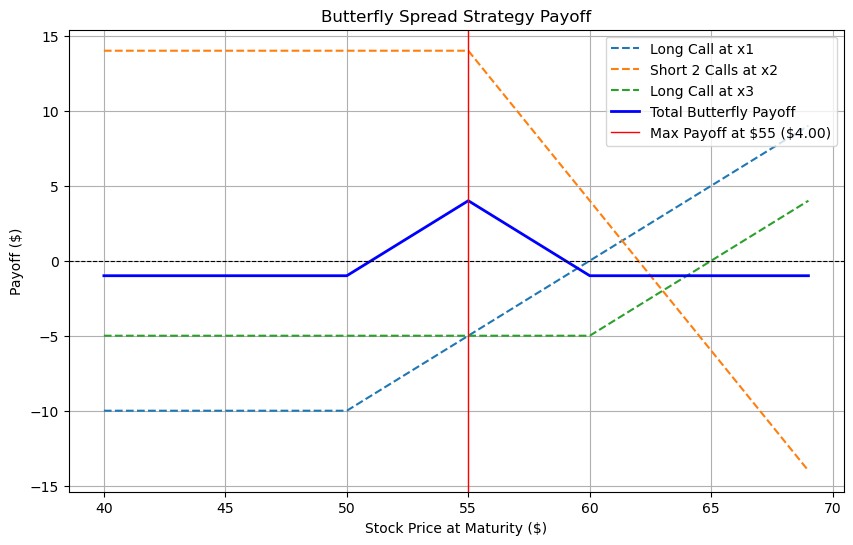

In [26]:
x1 = 50  
x2 = 55  
x3 = 60  
p1 = 10  
p2 = 7  
p3 = 5   

stock_prices = np.arange(40, 70, 1)

payoff_x1_long = [max(0, price - x1) - p1 for price in stock_prices]
payoff_x2_short = [-2 * (max(0, price - x2) - p2) for price in stock_prices]
payoff_x3_long = [max(0, price - x3) - p3 for price in stock_prices]
total_payoff = [p1 + p2 + p3 for p1, p2, p3 in zip(payoff_x1_long, payoff_x2_short, payoff_x3_long)]

max_payoff_index = np.argmax(total_payoff)
max_payoff_price = stock_prices[max_payoff_index]
max_payoff_value = total_payoff[max_payoff_index]

plt.figure(figsize=(10, 6))
plt.plot(stock_prices, payoff_x1_long, label='Long Call at x1', linestyle='--')
plt.plot(stock_prices, payoff_x2_short, label='Short 2 Calls at x2', linestyle='--')
plt.plot(stock_prices, payoff_x3_long, label='Long Call at x3', linestyle='--')
plt.plot(stock_prices, total_payoff, label='Total Butterfly Payoff', color='blue', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Zero line
plt.axvline(x=max_payoff_price, color='red', linestyle='-', linewidth=1, label=f'Max Payoff at \${max_payoff_price} (\${max_payoff_value:.2f})')
plt.title('Butterfly Spread Strategy Payoff')
plt.xlabel('Stock Price at Maturity ($)')
plt.ylabel('Payoff ($)')
plt.legend()
plt.grid(True)
plt.show()


f.) Why might an investor enter into such a strategy? **\[2 marks\]**

Solution:

The butterfly strategy is ideal for investors expecting low volatility, as it profits most when the stock price remains near the middle strike price $K_2 = 55$. The chart shows that the strategy offers limited risk, with losses capped beyond $K_1 = 50$ and $K_3 = 60$, and a defined reward peaking at $K_2$. This cost-efficient and neutral approach appeals to risk-averse investors looking to capitalize on range-bound market conditions.

g.) Use binomial model (set some arbitrary high number of iterations) to price the european butterfly option from part e.), assuming it has 1 year to maturity, the risk-free rate is 1.5% and the annualized volatility of the underlying stock is 15%. **\[5 marks\]**


1. **Butterfly Spread Payoff at Maturity ($\text{Payoff}[i]$):**
   $$
   \text{Payoff}[i] = \max(S_p[i] - k_1, 0) - 2 \cdot \max(S_p[i] - k_2, 0) + \max(S_p[i] - k_3, 0)
   $$

2. **Backward Recursion Using Payoff ($\text{Payoff}^{(j, i)}$):**
   $$
   \text{Payoff}^{(j, i)} = e^{-r \Delta t} \cdot \left(p \cdot \text{Payoff}^{(j+1, i+1)} + (1 - p) \cdot \text{Payoff}^{(j+1, i)}\right), \quad j = n-1, n-2, \dots, 0, \, i = 0, 1, \dots, j
   $$

3. **Smooth Payoff Using Interpolation:**
   $$
   \text{Payoff}_{\text{smooth}}(S) = \text{Spline}(\text{Payoff}_{\text{original}})
   $$
   $\text{Spline}$ is a smooth function generated using B-spline interpolation methods `make_interp_spline`, applied to the discrete $\text{Payoff}_{\text{original}}$ data points.
   
   The resulting $\text{Payoff}_{\text{smooth}}(S)$ represents a continuous and smooth payoff curve as a function of stock prices $S$.


Original Points:
n = 10, Butterfly Option Price = 1.0912
n = 510, Butterfly Option Price = 1.1132
n = 1010, Butterfly Option Price = 1.1155
n = 1510, Butterfly Option Price = 1.1148
n = 2010, Butterfly Option Price = 1.1151
n = 2510, Butterfly Option Price = 1.1158
n = 3010, Butterfly Option Price = 1.1148


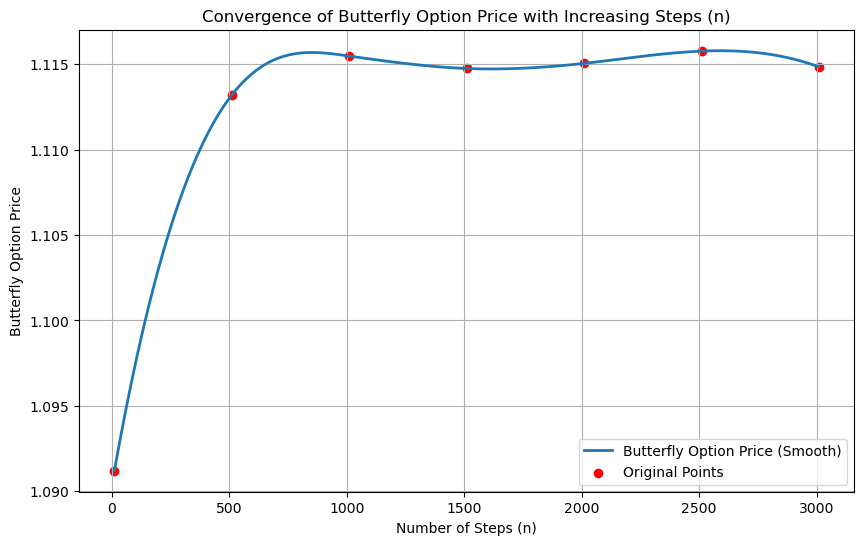

In [27]:
from scipy.interpolate import make_interp_spline

s_0 = 57.03  
k1 = 50  
k2 = 55 
k3 = 60  
r = 0.015  
sigma = 0.15 
t = 1

def binomial_butterfly(s_0, k1, k2, k3, r, sigma, T, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt)) 
    d = 1 / u  
    p = (np.exp(r * dt) - d) / (u - d) 
    discount = np.exp(-r * dt)

    stock_prices = np.zeros(n + 1)
    option_values = np.zeros(n + 1)

    for i in range(n + 1):
        stock_prices[i] = s_0 * (u ** i) * (d ** (n - i))
        sp = stock_prices[i]
        long_call1 = max(sp - k1, 0)
        short_call = -2 * max(sp - k2, 0)
        long_call2 = max(sp - k3, 0)
        option_values[i] = long_call1 + short_call + long_call2

    for j in range(n - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = discount * (p * option_values[i + 1] + (1 - p) * option_values[i])

    return option_values[0]

# Generate more dense n values for smoother curve
n = np.arange(10, 3011, 500)
prices = [binomial_butterfly(s_0, k1, k2, k3, r, sigma, t, n) for n in n]
print("Original Points:")
for n_val, price in zip(n, prices):
    print(f"n = {n_val}, Butterfly Option Price = {price:.4f}")

# Smooth the curve using interpolation
n_smooth = np.linspace(n.min(), n.max(), 500)
spline = make_interp_spline(n, prices)
prices_smooth = spline(n_smooth)
# print("\nInterpolated Points:")
# for n_val, price in zip(n_smooth, prices_smooth):
#     print(f"n = {n_val:.2f}, Butterfly Option Price = {price:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_smooth, prices_smooth, label="Butterfly Option Price (Smooth)", linewidth=2)
plt.scatter(n, prices, color='red', label="Original Points")  # Original points for reference
plt.title("Convergence of Butterfly Option Price with Increasing Steps (n)")
plt.xlabel("Number of Steps (n)")
plt.ylabel("Butterfly Option Price")
plt.grid(True)
plt.legend()
plt.show()

As $n$ (the number of steps in the binomial tree) increases, more data points are generated, providing finer granularity in stock price nodes. This leads to convergence of the payoff values toward the theoretical continuous model, resulting in a smoother curve. Consequently, the interpolated payoff curve better reflects the strategy's behavior as $n \to \infty$, close to 1.115.


# Question 5: Case Study **\[14 marks\]**
Using the data sources and tools introduced in Workshop 3, along with any relevant material from the lectures, analyze the current state and future outlook of a selected country/economy from a macroeconomic and financial perspective. As a primary suggestion, groups may consider analyzing the United States economy, as most available free data sources focus on this country. However, groups are welcome to choose any country/economy they wish to analyze. Groups MUST include figures and/or tables from various data sources, as well as research reports or studies that justify and support the analysis conducted. The report should be approximately 600/700 words, excluding the bibliography, captions for tables and figures, and any numbers included in tables.

# Question 6: Case Study **\[17 marks\]**
Using the data sources and tools introduced in Workshop 3, along with any relevant material from the lectures, analyze the current state and future outlook of a selected publicly traded company (stock) included in a major stock market index, such as the S&P 500 or Russell 2000, among others. The company may be located in a different country than the one chosen in Question 5. As a primary suggestion, groups may consider analyzing a company from the “Magnificent 7”: Apple, Microsoft, Alphabet (Google), Amazon, Nvidia, Tesla, or Meta (Facebook). You should include, at least, a brief introduction to the company (i.e., a description of its main business) and a fundamental analysis.

Groups MUST include figures and/or tables from a variety of data sources, as well as research reports or studies that justify and support the analysis conducted. The report should be approximately 600/700 words, excluding the bibliography, captions for tables and figures, and any numbers included in tables.

You are not limited to analyzing an “excellent” publicly company/stock; you may also consider a poorly performing company whose stock price may decline, making a short position potentially profitable.

Each group, working as financial analysts, must provide a final conclusion based on their analysis by assigning a rating to the company. The rating scale is as follows:
- (5) Strong Sell
- (4) Sell
- (3) Neutral
- (2) Buy
- (1) Strong Buy

Note that calculating a (target) price for the company is not required; simply provide a recommendation based on thorough research and analysis.

In [28]:
# Ticker name
ticker = 'NVDA'

# Read data
stock_data = yf.download(ticker, start="2023-12-01", end="2024-11-27")

# Ensure the data are sorted by Date
stock_data = stock_data.sort_values(by='Date')

# Show the first five rows of stock_data
stock_data.head()

# Get the adjusted close prices
stock_prices = stock_data['Adj Close']

# Change the data type to Dataframe
# stock_prices: pd.DataFrame = stock_prices.to_frame()
print(type(stock_prices))

# Display the result
stock_prices

# Calculate the daily returns of the adjusted close price
stock_prices['Returns'] = stock_prices['Adj Close'].pct_change()

# Check the first five rows of stock prices
print(stock_prices.head(3))

# Quick check
print("Quick check, the first entry in 'Returns' is: "+str((55.089348-55.042877)/55.042877))

# Convert the decimal returns into percentage returns
percent_return = stock_prices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

#Plot the returns histogram
plt.title('Return Distribution of {}'.format(ticker))
plt.hist(returns_plot, bins=75,density=False)
plt.show()

# Find N
N = stock_prices['Returns'].dropna().count()

# The (1 + Return) component
return_comp = (1 + stock_prices['Returns'].dropna()).prod()

# Annualized return
annualized_return = return_comp**(252/N) - 1
print("The annualized return is: "+str(annualized_return))


# Annualize the standard deviation
sigma_annualized = sigma_daily * np.sqrt(252)
print("The standard deviation of the daily return is: "+str(sigma_annualized))


# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print("The daily variance is: "+str(variance_annualized))

# Drop the missing values
clean_returns = stock_prices['Returns'].dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = stats.skew(clean_returns)
print("The skewness of the returns distribution is: "+str(returns_skewness))

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = stats.shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)


[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.series.Series'>


KeyError: 'Adj Close'